### Debugging a Broken Function

> * 데이터를 분석하다보면 데이터의 표시 형식이 변경되는 경우(시간표기 24시 --> 12시)가 있다.
> * 이런 경우 프로그램 수행 시 에러가 발생하거나 그래프의 트랜드가 예측과 다르거나, 기존과 다르게 표시될 수 있다.
> * 이런 경우를 추적하여 Debugging하는 절차를 구현한다.
> * 본 프로젝트의 경우 데이터 다운로드 관련 패키지 파일은 'data.py', 'test_data.py' 이다.

In [1]:
%matplotlib inline

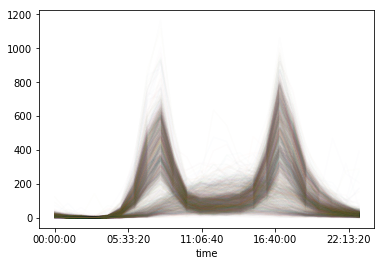

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend = False, alpha = 0.01);

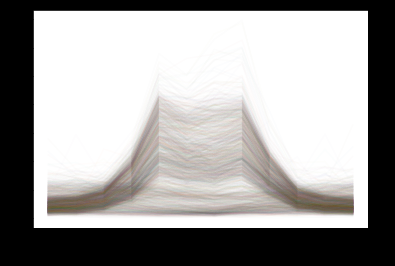


> * 결과 그래프(위 이미지)를 보면 그래프의 트랜드가 기존과 다르게 나오고
> * x축의 time의 값이 다른 것을 볼 수 있다.

In [3]:
#확인을 위해 index를 살펴본다
# pivoted.index
pivoted.index[:24]
# index인 time이 "01:00:00 ~ 12:00:00"로 설정된 것을 볼 수 있다

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [4]:
# 데이터 인덱스 살펴보기
# data.index # 'DatatimeIndex' 또한 "01:00:00 ~ 12:00:00"로 설정된 것을 볼 수 있다

import numpy as np
np.unique(data.index.time) # unique time으로 살펴보면 12h로 되어 있는 것을 알 수 있다

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

#### * 시간표기가 '24시 --> 12시'로 변경 된 것이 확인 되었으므로

> * 'data.py'를 열어 해당부문(time format)을 맞게 고쳐준다 (%H --> %I)
>> try:
>>        data.index = pd.to_datetime(data.index, format = '%m/%d/%Y %H:%M:%S %p')
>> except TypeError:

#### * 수정 후 본 파일을 전체 재 실행

> - 그래프의 트렌드와 시간표기가 변경된 것을 확인할 수 있다

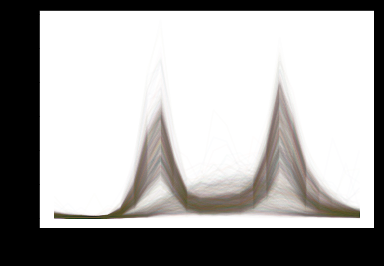

#### unit test에도 적용될 수 있도록 'test_data.py' 를 수정한다
> assert len(np.unique(data.index.time) == 24) 추가

#### 추가 후 unit test를 수행해본다
>> python -m pytest jupyterworkflow

>>> 1.73 seconds 속도로 다운로드가 진행되었음을 확인할 수 있다